In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# 다운 받은 csv를 pandas의 DataFrame 형식으로 불러온다.
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
data = data.drop('id',axis = 1)
test = test.drop('id',axis = 1)
data

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.0,15.3,220,MALE,8.30515,-25.19017,5550
1,Chinstrap penguin (Pygoscelis antarctica),Dream,No,49.5,19.0,200,MALE,9.63074,-24.34684,3800
2,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,45.1,14.4,210,FEMALE,8.51951,-27.01854,4400
3,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,44.5,14.7,214,FEMALE,8.20106,-26.16524,4850
4,Gentoo penguin (Pygoscelis papua),Biscoe,No,49.6,16.0,225,MALE,8.38324,-26.84272,5700
...,...,...,...,...,...,...,...,...,...,...
109,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,36.6,17.8,185,FEMALE,NaN,NaN,3700
110,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,39.2,18.6,190,MALE,9.11006,-25.79549,4250
111,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,43.2,18.5,192,MALE,8.97025,-26.03679,4100
112,Chinstrap penguin (Pygoscelis antarctica),Dream,No,46.9,16.6,192,FEMALE,9.80589,-24.73735,2700


In [60]:
def check_missing_col(dataframe):
    missing_col = []
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은 : {col}입니다')
            print(f'해당 컬럼에 총 {missing_values}개의 결측치가 존재합니다.')
            missing_col.append([col,dataframe[col].dtype])
    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')
    return missing_col
missing_col = check_missing_col(data)

결측치가 있는 컬럼은 : Sex입니다
해당 컬럼에 총 3개의 결측치가 존재합니다.
결측치가 있는 컬럼은 : Delta 15 N (o/oo)입니다
해당 컬럼에 총 3개의 결측치가 존재합니다.
결측치가 있는 컬럼은 : Delta 13 C (o/oo)입니다
해당 컬럼에 총 3개의 결측치가 존재합니다.


In [28]:
data[data.isna().sum(axis=1) > 0]

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
6,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,42.0,20.2,190,NaN,9.13362,-25.09368,4250
8,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,34.1,18.1,193,NaN,NaN,NaN,3475
18,Adelie Penguin (Pygoscelis adeliae),Dream,No,39.8,19.1,184,MALE,NaN,NaN,4650
70,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,46.2,14.4,214,NaN,8.24253,-26.81540,4650
109,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,36.6,17.8,185,FEMALE,NaN,NaN,3700


In [29]:
# 결측치를 처리하는 함수를 작성합니다.
def handle_na(data, missing_col):
    temp = data.copy()
    for col, dtype in missing_col:
        if dtype == 'O':
            # 카테고리형 feature가 결측치인 경우 해당 행들을 삭제해 주었습니다.
            temp = temp.dropna(subset=[col])
        elif dtype == int or dtype == float:
            # 수치형 feature가 결측치인 경우 평균값을 채워주었습니다.
            temp.loc[:,col] = temp[col].fillna(temp[col].mean())
    return temp

data = handle_na(data, missing_col)

# 결측치 처리가 잘 되었는지 확인해 줍니다.
missing_col = check_missing_col(data) 

결측치가 존재하지 않습니다


In [30]:
data

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.0,15.3,220,MALE,8.305150,-25.190170,5550
1,Chinstrap penguin (Pygoscelis antarctica),Dream,No,49.5,19.0,200,MALE,9.630740,-24.346840,3800
2,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,45.1,14.4,210,FEMALE,8.519510,-27.018540,4400
3,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,44.5,14.7,214,FEMALE,8.201060,-26.165240,4850
4,Gentoo penguin (Pygoscelis papua),Biscoe,No,49.6,16.0,225,MALE,8.383240,-26.842720,5700
...,...,...,...,...,...,...,...,...,...,...
109,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,36.6,17.8,185,FEMALE,8.738543,-25.718804,3700
110,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,39.2,18.6,190,MALE,9.110060,-25.795490,4250
111,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,43.2,18.5,192,MALE,8.970250,-26.036790,4100
112,Chinstrap penguin (Pygoscelis antarctica),Dream,No,46.9,16.6,192,FEMALE,9.805890,-24.737350,2700


In [31]:
data.describe()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,44.717117,17.000000,203.162162,8.738543,-25.718804,4333.333333
std,5.290899,1.925192,14.731253,0.564470,0.851332,787.518639
min,33.500000,13.200000,174.000000,7.632200,-27.018540,2700.000000
25%,40.450000,15.250000,190.000000,8.274020,-26.408475,3675.000000
50%,45.200000,17.200000,199.000000,8.634880,-25.898340,4250.000000
75%,49.150000,18.600000,216.000000,9.264635,-25.005945,4875.000000
max,55.100000,21.100000,231.000000,10.025440,-24.102550,6300.000000


In [32]:
discrete_names = ['Species', 'Island', 'Clutch Completion', 'Sex']
continuous_names = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']

# categorical defect delete

In [33]:
data.dtypes

Species                 object
Island                  object
Clutch Completion       object
Culmen Length (mm)     float64
Culmen Depth (mm)      float64
Flipper Length (mm)      int64
Sex                     object
Delta 15 N (o/oo)      float64
Delta 13 C (o/oo)      float64
Body Mass (g)            int64
dtype: object

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              114 non-null    object 
 1   Island               114 non-null    object 
 2   Clutch Completion    114 non-null    object 
 3   Culmen Length (mm)   114 non-null    float64
 4   Culmen Depth (mm)    114 non-null    float64
 5   Flipper Length (mm)  114 non-null    int64  
 6   Sex                  111 non-null    object 
 7   Delta 15 N (o/oo)    111 non-null    float64
 8   Delta 13 C (o/oo)    111 non-null    float64
 9   Body Mass (g)        114 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 9.0+ KB


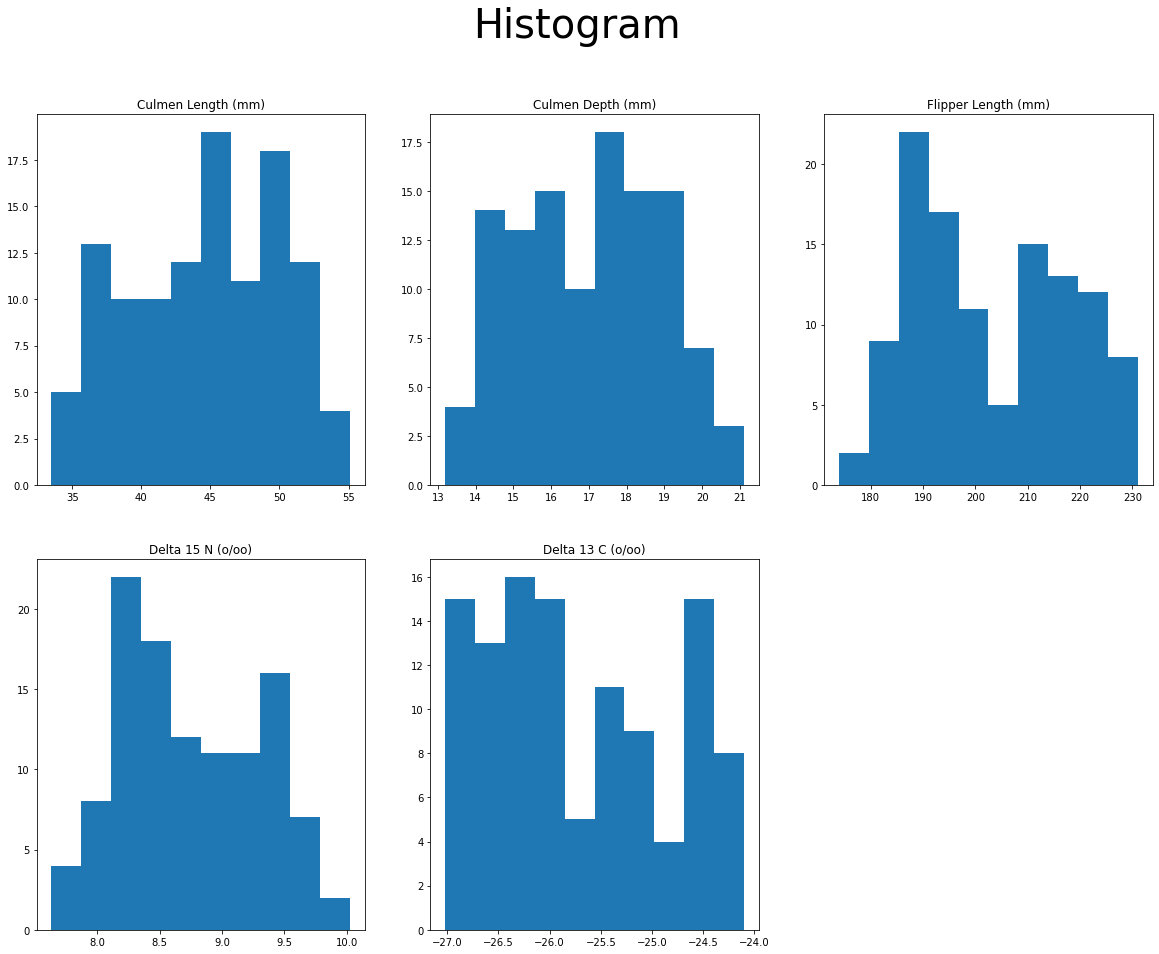

In [62]:
plt.figure(figsize=(20,15))
plt.suptitle("Histogram", fontsize=40)

for i in range(len(continuous_names)):
    plt.subplot(2,3,i+1)
    plt.title(continuous_names[i])
    plt.hist(data[continuous_names[i]])

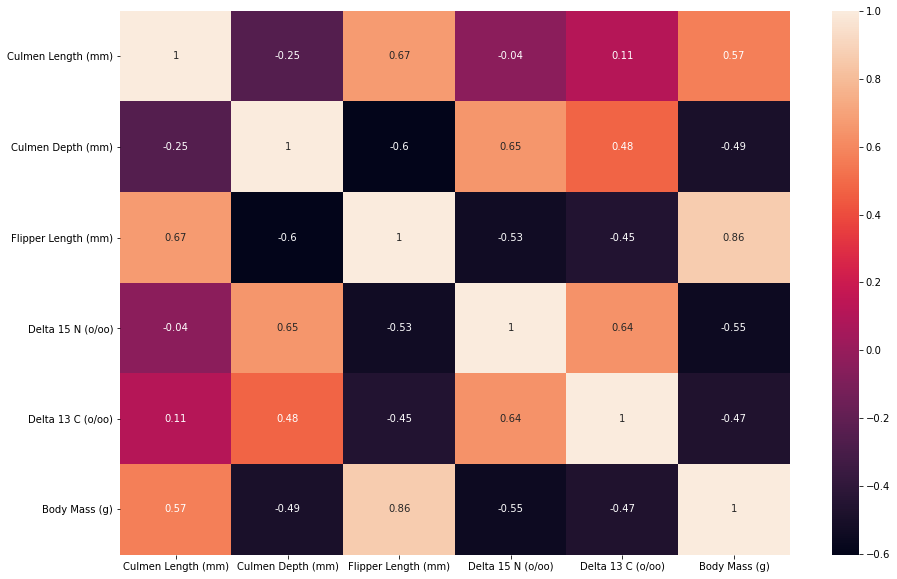

In [63]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(data.drop(discrete_names, axis = 1).corr(), annot=True)
plt.show()

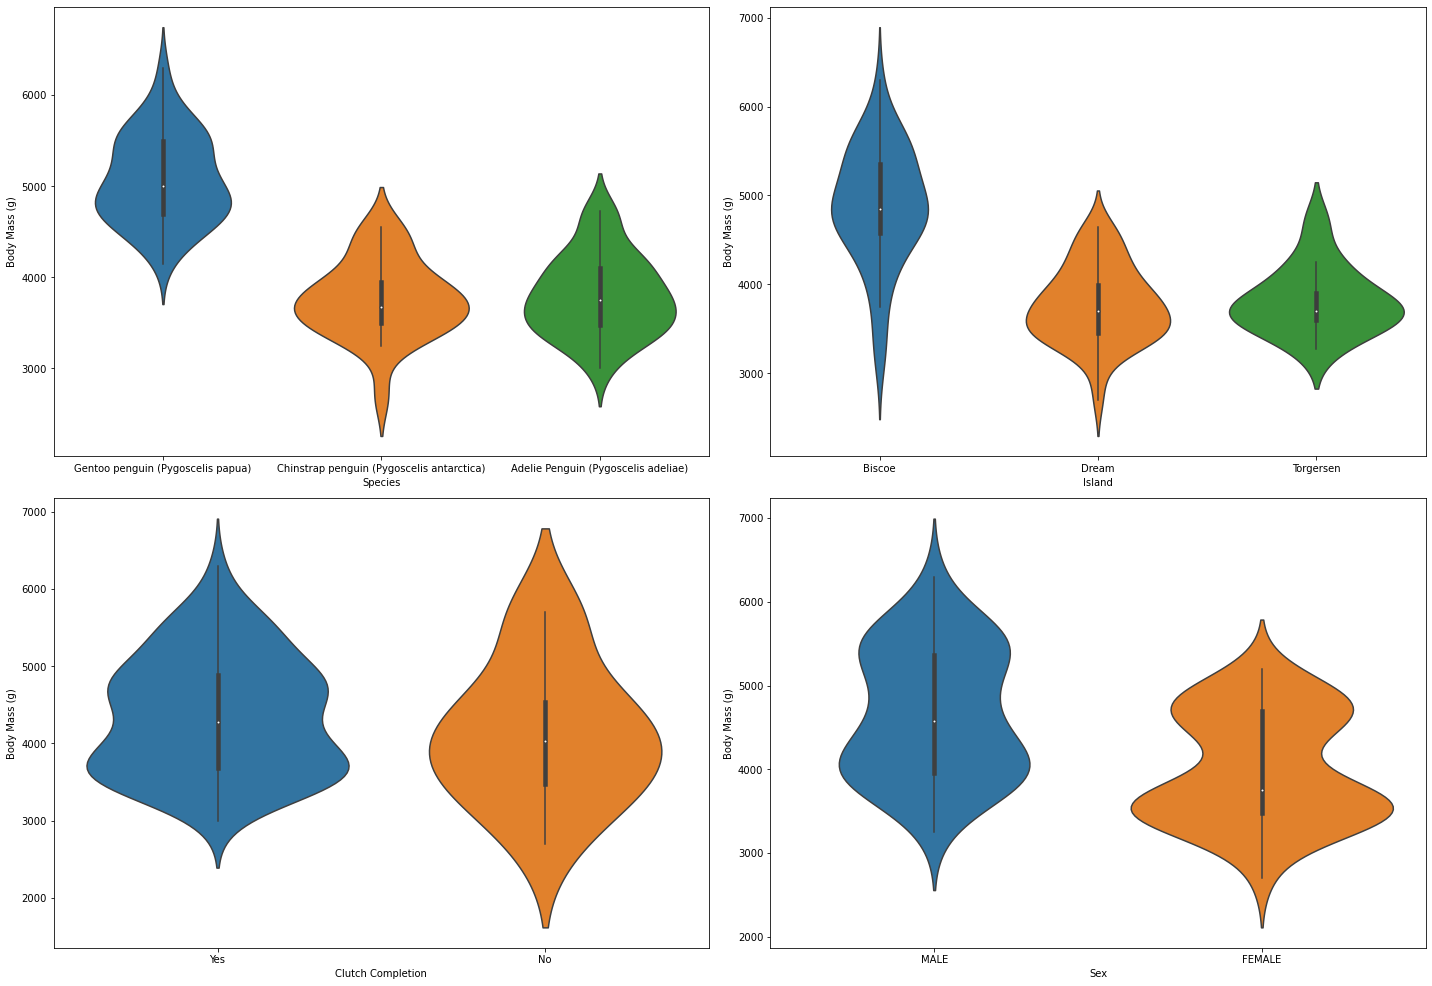

In [64]:
plt.figure(figsize=(20,15))

for i in range(len(discrete_names)):
    plt.subplot(2,2,i+1)
    plt.xlabel(discrete_names[i])
    plt.ylabel('Body Mass (g)')
    sns.violinplot(x= data[discrete_names[i]], y= data['Body Mass (g)'])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [65]:
data = pd.get_dummies(data)
test = pd.get_dummies(test)

print(data.shape)
print(test.shape)

(114, 16)
(228, 15)


In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaler = scaler.fit_transform(data[continuous_names])
data[continuous_names] = pd.DataFrame(data = data_scaler, columns = continuous_names)

test_scaler = scaler.fit_transform(test[continuous_names])
test[continuous_names] = pd.DataFrame(data = test_scaler, columns = continuous_names)

data[continuous_names].head()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo)
0,1.016685,-0.887255,1.161653,-0.765275,0.622594
1,0.922318,1.027037,-0.209242,1.580340,1.607903
2,0.091884,-1.352893,0.476205,-0.385968,-1.513591
3,-0.021357,-1.197680,0.750384,-0.949461,-0.516633
4,0.941191,-0.525091,1.504376,-0.627096,-1.308170


In [69]:
data_label = data['Body Mass (g)']
data.drop(['Body Mass (g)'],axis = 1, inplace = True)
data.info()

KeyError: 'Body Mass (g)'

In [70]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

alphas = [0,0.1,1,10,100]

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    
    neg_mse_scores = cross_val_score(ridge, data, data_label, scoring = 'neg_mean_squared_error', cv = 5)
    avg_rmse = np.mean(np.sqrt(-neg_mse_scores))
    print('alpha 값 ', alpha, '일때 평균 rmse :', np.round(avg_rmse,4))

alpha 값  0 일때 평균 rmse : nan
alpha 값  0.1 일때 평균 rmse : nan
alpha 값  1 일때 평균 rmse : nan
alpha 값  10 일때 평균 rmse : nan
alpha 값  100 일때 평균 rmse : nan


C:\Users\yarnp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\yarnp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\yarnp\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "C:\Users\yarnp\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 542, in fit
    X, y = self._validate_data(X, y,
  File "C:\Users\yarnp\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\yarnp\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:

In [71]:
ridge = Ridge(alpha = 10)
ridge.fit(data, data_label)
sample_submission = pd.read_csv('./sample_submission.csv')
sample_submission['Body Mass (g)'] = ridge.predict(test)
sample_submission.to_csv('Penguin_final_1.csv',index=False)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [54]:
data.

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Species_Adelie Penguin (Pygoscelis adeliae),Species_Chinstrap penguin (Pygoscelis antarctica),Species_Gentoo penguin (Pygoscelis papua),Island_Biscoe,Island_Dream,Island_Torgersen,Clutch Completion_No,Clutch Completion_Yes,Sex_FEMALE,Sex_MALE
0,0.989059,-0.900327,1.113486,-0.771310,0.609352,0,0,1,1,0,0,0,1,0,1
1,0.894279,1.037970,-0.229809,1.553837,1.621727,0,1,0,0,1,0,1,0,0,1
2,0.060213,-1.371805,0.441839,-0.395312,-1.585513,0,0,1,1,0,0,0,1,1,0
3,-0.053523,-1.214646,0.710498,-0.953889,-0.561169,0,0,1,1,0,0,0,1,1,0
4,0.913235,-0.533622,1.449310,-0.634336,-1.374450,0,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,-1.551049,0.409333,-1.237280,-0.011117,-0.025245,1,0,0,0,1,0,0,1,1,0
98,-1.058192,0.828424,-0.901456,0.640540,-0.117303,0,0,1,1,0,0,0,1,0,1
99,-0.299951,0.776038,-0.767127,0.395307,-0.406972,0,0,1,1,0,0,0,1,1,0
100,0.401422,-0.219304,-0.767127,1.861059,1.152940,0,0,1,1,0,0,0,1,1,0


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 0 to 113
Data columns (total 15 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Culmen Length (mm)                                 99 non-null     float64
 1   Culmen Depth (mm)                                  99 non-null     float64
 2   Flipper Length (mm)                                99 non-null     float64
 3   Delta 15 N (o/oo)                                  99 non-null     float64
 4   Delta 13 C (o/oo)                                  99 non-null     float64
 5   Species_Adelie Penguin (Pygoscelis adeliae)        111 non-null    uint8  
 6   Species_Chinstrap penguin (Pygoscelis antarctica)  111 non-null    uint8  
 7   Species_Gentoo penguin (Pygoscelis papua)          111 non-null    uint8  
 8   Island_Biscoe                                      111 non-null    uint8  
 9   Island_Dre

In [56]:
# 결측치를 처리하는 함수를 작성합니다.
def handle_na(data, missing_col):
    temp = data.copy()
    for col, dtype in missing_col:
        if dtype == 'O':
            # 카테고리형 feature가 결측치인 경우 해당 행들을 삭제해 주었습니다.
            temp = temp.dropna(subset=[col])
        elif dtype == int or dtype == float:
            # 수치형 feature가 결측치인 경우 평균값을 채워주었습니다.
            temp.loc[:,col] = temp[col].fillna(temp[col].mean())
    return temp

data = handle_na(data, missing_col)

# 결측치 처리가 잘 되었는지 확인해 줍니다.
missing_col = check_missing_col(data) 

결측치가 있는 컬럼은 : Culmen Length (mm)입니다
해당 컬럼에 총 12개의 결측치가 존재합니다.
결측치가 있는 컬럼은 : Culmen Depth (mm)입니다
해당 컬럼에 총 12개의 결측치가 존재합니다.
결측치가 있는 컬럼은 : Flipper Length (mm)입니다
해당 컬럼에 총 12개의 결측치가 존재합니다.
결측치가 있는 컬럼은 : Delta 15 N (o/oo)입니다
해당 컬럼에 총 12개의 결측치가 존재합니다.
결측치가 있는 컬럼은 : Delta 13 C (o/oo)입니다
해당 컬럼에 총 12개의 결측치가 존재합니다.


In [57]:
data[data.isna().sum(axis=1) > 0]

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Species_Adelie Penguin (Pygoscelis adeliae),Species_Chinstrap penguin (Pygoscelis antarctica),Species_Gentoo penguin (Pygoscelis papua),Island_Biscoe,Island_Dream,Island_Torgersen,Clutch Completion_No,Clutch Completion_Yes,Sex_FEMALE,Sex_MALE
102,NaN,NaN,NaN,NaN,NaN,0,1,0,0,1,0,0,1,1,0
103,NaN,NaN,NaN,NaN,NaN,0,0,1,1,0,0,0,1,0,1
104,NaN,NaN,NaN,NaN,NaN,0,0,1,1,0,0,0,1,0,1
105,NaN,NaN,NaN,NaN,NaN,0,1,0,0,1,0,1,0,0,1
106,NaN,NaN,NaN,NaN,NaN,0,0,1,1,0,0,0,1,0,1
107,NaN,NaN,NaN,NaN,NaN,0,1,0,0,1,0,0,1,1,0
108,NaN,NaN,NaN,NaN,NaN,0,1,0,0,1,0,0,1,0,1
109,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,1,0,1,1,0
110,NaN,NaN,NaN,NaN,NaN,1,0,0,0,1,0,0,1,0,1
111,NaN,NaN,NaN,NaN,NaN,1,0,0,0,1,0,0,1,0,1
